In [20]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
dataDirectory = "E:\\Datasets\\Oxford Inertial Odometry\\Oxford Inertial Odometry Dataset_2.0\\Oxford Inertial Odometry Dataset\\handheld\\data1\\raw"

In [3]:
sensorFrame = pd.read_csv(dataDirectory+"\\imu1.csv")

truthFrame = pd.read_csv(dataDirectory+"\\vi1.csv")

In [6]:
sensorFrame.columns = ["Time", "attitude_roll", "attitude_pitch", "attitude_yaw",
"rotation_rate_x","rotation_rate_y","rotation_rate_z",
"gravity_x","gravity_y","gravity_z",
"user_acc_x","user_acc_y","user_acc_z",
"magnetic_field_x","magnetic_field_y","magnetic_field_z"]

truthFrame.columns = ["Time",  "Header",  
"translation.x", "translation.y", "translation.z", 
"rotation.x", "rotation.y", "rotation.z", "rotation.w"]

In [43]:
user = sensorFrame[["user_acc_x","user_acc_y","user_acc_z"]].to_numpy()
gravity = sensorFrame[["gravity_x","gravity_y","gravity_z"]].to_numpy()

user *= 9.80665
gravity *= 9.80665

for i in range(len(user)):
    print(str(np.linalg.norm(user[i]+gravity[i])))

93495638138
9.665389646031814
9.560068879554994
9.50138660479081
9.468883696446337
9.482020706109337
9.435329734123911
9.240634472657323
9.101388355314779
9.10040048996857
8.968985796015009
8.772650005436185
8.64132410394742
8.541334037121276
8.484885263761766
8.47271144927336
8.449372823495244
8.421763585107401
8.37472362289422
8.38066733955893
8.432593488258211
8.533427886273499
8.6288267916352
8.643021332323835
8.690649506714527
8.84136283352673
8.914358691857153
8.919358510875613
9.03862949461248
9.161384941254012
9.277448680894306
9.448827005931516
9.52737623069257
9.63766914128453
9.787973703714071
9.950405258637653
10.13895221223307
10.374231621232651
10.578014717100974
10.8088126230466
11.019239247235552
11.055026237982474
10.970505675419862
10.884748936072723
10.729837195235138
10.62543224572617
10.531477719370024
10.425928807978124
10.405570996814507
10.405476743108624
10.779295967985403
11.26764061797438
11.525359021990779
11.718799685845713
11.98116983543395
11.972794366702

In [22]:
deltaT = (1495463203.30-1495463203.29)*(38274.0/37602)

In [24]:
deltaT*37602/60

6.378993916511536

In [25]:
truth = [-28.0552784,  7.2347353, -16.4613971 ]
estimate = [ 80.1475172, 8.6928962, 92.081866 ]

In [9]:
truthFrame

Time  Header  translation.x  translation.y  \
0      1495462816472090000   11897      -1.300261       2.462219   
1      1495462816482150000   11898      -1.300067       2.462322   
2      1495462816492100000   11899      -1.299855       2.462451   
3      1495462816502080000   11900      -1.299683       2.462553   
4      1495462816512120000   11901      -1.299558       2.462738   
...                    ...     ...            ...            ...   
39466  1495463211429900000   51363      -1.638711       2.249202   
39467  1495463211439910000   51364      -1.638887       2.249213   
39468  1495463211449930000   51365      -1.639147       2.249214   
39469  1495463211459890000   51366      -1.639269       2.249233   
39470  1495463211469690000   51367      -1.639433       2.249250   

       translation.z  rotation.x  rotation.y  rotation.z  rotation.w  
0           0.830668   -0.257395   -0.017824   -0.116551    0.959086  
1           0.830730   -0.257462   -0.017792   -0.116555    0.959068  
2           0.830807   -0.257844   -0.017849   -0.116524    0.958968  
3           0.830890   -0.257837   -0.017645   -0.116447    0.958983  
4           0.830932   -0.258313   -0.017832   -0.116431    0.958854  
...              ...         ...         ...         ...         ...  
39466       1.140987   -0.197574   -0.059823   -0.365286    0.907718  
39467       1.140774   -0.197666   -0.060058   -0.365449    0.907617  
39468       1.140774   -0.197424   -0.059408   -0.365525    0.907681  
39469       1.140394   -0.197886   -0.060243   -0.365748    0.907436  
39470       1.140130   -0.197796   -0.060596   -0.365790    0.907415  

[39471 rows x 9 columns]

In [42]:
time = 1495463211459890001

nearest = truthFrame.iloc[(truthFrame['Time']-time).abs().argsort()[:2]]

nearest


Time  Header  translation.x  translation.y  \
39469  1495463211459890000   51366      -1.639269       2.249233   
39470  1495463211469690000   51367      -1.639433       2.249250   

       translation.z  rotation.x  rotation.y  rotation.z  rotation.w  \
39469       1.140394   -0.197886   -0.060243   -0.365748    0.907436   
39470       1.140130   -0.197796   -0.060596   -0.365790    0.907415   

       reference.x  
39469          NaN  
39470          NaN

In [49]:
nearest['Time'].iloc[1]

1495463211469690000

In [131]:
newFrame = pd.DataFrame(columns=["time", "truth.x", "truth.y", "truth.z", "reference.x", "reference.y", "reference.z","estimate.x", "estimate.y", "estimate.z"])

newFrame.loc[0]= [0, 0,0,0, 0,0,0, 0,0,0]

newFrame.loc[newFrame.time == -1, 'truth.x'] = 2

-1 in newFrame.time

newFrame.loc[len(newFrame)] = [1495462851.54, 0,0,0, 0,0,0, 0,0,0]
newFrame.loc[len(newFrame)] = [-1.54, 0,0,0, 0,0,0, 0,0,0]
newFrame

time truth.x truth.y truth.z reference.x reference.y reference.z  \
0            0       0       0       0           0           0           0   
1  1.49546e+09       0       0       0           0           0           0   
2        -1.54       0       0       0           0           0           0   

  estimate.x estimate.y estimate.z  
0          0          0          0  
1          0          0          0  
2          0          0          0

In [16]:
{"time":[], "truth.x":, "truth.y":, "truth.z":, "reference.x":, "reference.y":, "reference.z":,"estimate.x":, "estimate.y":, "estimate.z":}

SyntaxError: invalid syntax (<ipython-input-16-6edb2f29c96c>, line 1)

In [75]:
newFrame['time'][1]

1495462851.54

In [67]:
newFrame[0]

KeyError: 0

In [70]:
1495462851.54 in newFrame['time']

False

In [102]:
a = newFrame.isin([1495462851.54])['time']
columns = a.index[a].tolist()
if len(columns) == 0:
    print("aa")

In [139]:
newFrame = newFrame.sort_values("time")
newFrame = newFrame.reset_index(drop=True)

newFrame['time'][0]


-1.54

In [142]:
a = np.eye(6)
a[3:,3:] = np.zeros((3,3))
a

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [145]:
a = np.array([1,2,3])
a.shape = (3,1)
a[0] * 2

array([2])

In [7]:
mag = sensorFrame[["magnetic_field_x","magnetic_field_y","magnetic_field_z"]].to_numpy()

In [14]:
magnitude = np.linalg.norm(mag, axis=1)
magnitude *= (1e-6)

In [15]:
magneticIntensity = 48956.6e-9

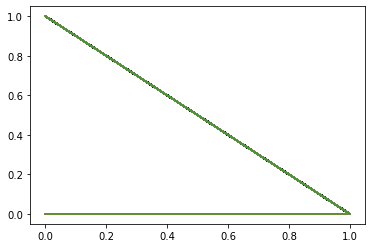

In [30]:
test = abs(magnitude-magneticIntensity)<1e-5

plt.plot([test,magnitude])
plt.show()

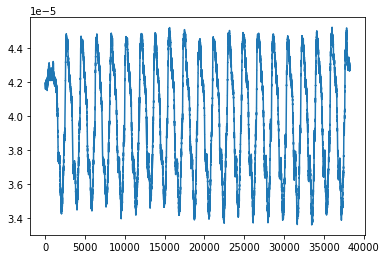

In [28]:
plt.plot(magnitude)